# Libraries

In [0]:
import cv2 # For CV operations
from PIL import Image  #To create and store images
import numpy as np

#To binarize the input
import h5py
import os

### Mapping the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My Drive/Colab Notebooks/cropped_months/dataset/

/content/drive/My Drive/Colab Notebooks/cropped_months/dataset


## Resizing the Images (Input) (Satellite Images)

In [6]:
# Resizing each image (1500 * 1500) to image (256 * 256) and converting the ground truths to binary masks

originalImages = os.listdir("Training/Input")
dim = (256, 256) #(w,h)

for index,image in enumerate(originalImages):
  
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = cv2.imread("Training/Input/" + str(image), 1)
  
  resizedImage = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)
  
  imageName = str(image).split(".")[0]
  print("Shape of resized Image is : ", resizedImage.shape)
  
  #Converting to .png and Storing resized image to a directory
  
  cv2.imwrite(os.getcwd() + "/TrainingImages/" + imageName + ".png", resizedImage)
  print("Resized and Stored Image : " + str(image) +" with Index : "+str(index))


Reading Image : 11278720_15.tiff with Index : 0
Shape of resized Image is :  (256, 256, 3)
Resized and Stored Image : 11278720_15.tiff with Index : 0
Reading Image : 11278735_15.tiff with Index : 1
Shape of resized Image is :  (256, 256, 3)
Resized and Stored Image : 11278735_15.tiff with Index : 1
Reading Image : 11278750_15.tiff with Index : 2
Shape of resized Image is :  (256, 256, 3)
Resized and Stored Image : 11278750_15.tiff with Index : 2
Reading Image : 11278765_15.tiff with Index : 3
Shape of resized Image is :  (256, 256, 3)
Resized and Stored Image : 11278765_15.tiff with Index : 3
Reading Image : 11278780_15.tiff with Index : 4
Shape of resized Image is :  (256, 256, 3)
Resized and Stored Image : 11278780_15.tiff with Index : 4
Reading Image : 11278795_15.tiff with Index : 5
Shape of resized Image is :  (256, 256, 3)
Resized and Stored Image : 11278795_15.tiff with Index : 5
Reading Image : 11278810_15.tiff with Index : 6
Shape of resized Image is :  (256, 256, 3)
Resized a

## Resizing the labels to Binary Masks

In [7]:
# Resizing each image (1500 * 1500) to image (256 * 256) and converting the ground truths to binary masks

originalImages = os.listdir("Training/InputLables")
dim = (256, 256) #(w,h)

for index,image in enumerate(originalImages):
  
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = cv2.imread("Training/InputLables/" + str(image), 0)
  
  resizedImage = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)
  
  imageName = str(image).split(".")[0]
  
  (thresh, im_bw) = cv2.threshold(resizedImage, 128, 255, cv2.THRESH_BINARY)
  
  print("Shape of resized Image is : ", im_bw.shape)
  
  #Converting to .png and Storing resized image to a directory
  
  cv2.imwrite(os.getcwd() + "/TrainingMasks/" + imageName + ".png", im_bw)
  print("Resized and Stored Image : " + str(image) +" with Index : "+str(index))

Reading Image : 11278720_15.tif with Index : 0
Shape of resized Image is :  (256, 256)
Resized and Stored Image : 11278720_15.tif with Index : 0
Reading Image : 11278735_15.tif with Index : 1
Shape of resized Image is :  (256, 256)
Resized and Stored Image : 11278735_15.tif with Index : 1
Reading Image : 11278750_15.tif with Index : 2
Shape of resized Image is :  (256, 256)
Resized and Stored Image : 11278750_15.tif with Index : 2
Reading Image : 11278765_15.tif with Index : 3
Shape of resized Image is :  (256, 256)
Resized and Stored Image : 11278765_15.tif with Index : 3
Reading Image : 11278780_15.tif with Index : 4
Shape of resized Image is :  (256, 256)
Resized and Stored Image : 11278780_15.tif with Index : 4
Reading Image : 11278795_15.tif with Index : 5
Shape of resized Image is :  (256, 256)
Resized and Stored Image : 11278795_15.tif with Index : 5
Reading Image : 11278810_15.tif with Index : 6
Shape of resized Image is :  (256, 256)
Resized and Stored Image : 11278810_15.tif 

## Creating input & mask arrays

In [8]:
images = []
originalImages = os.listdir("TrainingImages/")

for index,image in enumerate(originalImages):
    print("Image number : " +str(index) )
    img = Image.open("TrainingImages/" + str(image))
    
    arr = np.array(img)
    #arr = np.expand_dims(arr, -1)
    images.append(arr)

Image number : 0
Image number : 1
Image number : 2
Image number : 3
Image number : 4
Image number : 5
Image number : 6
Image number : 7
Image number : 8
Image number : 9
Image number : 10
Image number : 11
Image number : 12
Image number : 13
Image number : 14
Image number : 15
Image number : 16
Image number : 17
Image number : 18
Image number : 19
Image number : 20
Image number : 21
Image number : 22
Image number : 23
Image number : 24
Image number : 25
Image number : 26
Image number : 27
Image number : 28
Image number : 29
Image number : 30
Image number : 31
Image number : 32
Image number : 33
Image number : 34
Image number : 35
Image number : 36
Image number : 37
Image number : 38
Image number : 39
Image number : 40
Image number : 41
Image number : 42
Image number : 43
Image number : 44
Image number : 45
Image number : 46
Image number : 47
Image number : 48
Image number : 49
Image number : 50
Image number : 51
Image number : 52
Image number : 53
Image number : 54
Image number : 55
Im

In [9]:
masks = []
originalImages = os.listdir("TrainingMasks/")

for index,image in enumerate(originalImages):
  print("Image number : " +str(index) )
  img = Image.open("TrainingMasks/" + str(image))
  arr = np.array(img)
  arr = np.expand_dims(arr, -1)
  masks.append(arr)

Image number : 0
Image number : 1
Image number : 2
Image number : 3
Image number : 4
Image number : 5
Image number : 6
Image number : 7
Image number : 8
Image number : 9
Image number : 10
Image number : 11
Image number : 12
Image number : 13
Image number : 14
Image number : 15
Image number : 16
Image number : 17
Image number : 18
Image number : 19
Image number : 20
Image number : 21
Image number : 22
Image number : 23
Image number : 24
Image number : 25
Image number : 26
Image number : 27
Image number : 28
Image number : 29
Image number : 30
Image number : 31
Image number : 32
Image number : 33
Image number : 34
Image number : 35
Image number : 36
Image number : 37
Image number : 38
Image number : 39
Image number : 40
Image number : 41
Image number : 42
Image number : 43
Image number : 44
Image number : 45
Image number : 46
Image number : 47
Image number : 48
Image number : 49
Image number : 50
Image number : 51
Image number : 52
Image number : 53
Image number : 54
Image number : 55
Im

In [10]:
images = np.array(images)
masks = np.array(masks)

print(masks.shape)
print(images.shape)

(1108, 256, 256, 1)
(1108, 256, 256, 3)


## Finalizing Dataset for Training

In [0]:
with h5py.File("Dataset_train.h5", 'w') as hdf:
    hdf.create_dataset('images', data=images, compression='gzip', compression_opts=9)
    hdf.create_dataset('masks', data=masks, compression='gzip', compression_opts=9)

# U-Net Model for Road Segmentation

In [12]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras import backend as keras

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Model Definition

In [0]:
def unet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

### Optimizer : Adam, Loss : Binary Cross Entropy

In [14]:
print('*'*30)
print('Loading and preprocessing train data...')
print('*'*30)
file = h5py.File('Dataset_train.h5', 'r')
imgs_train = file.get('images')
imgs_mask_train = file.get('masks')
imgs_train = np.array(imgs_train)
imgs_mask_train = np.array(imgs_mask_train)

print(imgs_train.shape)
print(imgs_mask_train.shape)
#imgs_train = imgs_train.reshape(1108,256,256,1)

 
imgs_train = imgs_train.astype('float32')

mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255  # scale masks to [0, 1]

print('*'*30)
print('Creating and compiling model...')
print('*'*30)
model = unet()
model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)
tensorboard = TensorBoard(log_dir='tensorboard/', write_graph=True, write_images=True)

******************************
Loading and preprocessing train data...
******************************
(1108, 256, 256, 3)
(1108, 256, 256, 1)
******************************
Creating and compiling model...
******************************
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


## Model Fitting

In [0]:
model.summary()

In [15]:
print('*'*30)
print('Fitting model...')
print('*'*30)
history =  model.fit(imgs_train, imgs_mask_train, batch_size=16, epochs=30, verbose=2, shuffle=True,validation_split=0.2,callbacks=[model_checkpoint, tensorboard])

******************************
Fitting model...
******************************
Instructions for updating:
Use tf.cast instead.
Train on 886 samples, validate on 222 samples
Epoch 1/30
 - 86s - loss: 0.2241 - acc: 0.9489 - val_loss: 0.1671 - val_acc: 0.9620
Epoch 2/30
 - 64s - loss: 0.1691 - acc: 0.9498 - val_loss: 0.1514 - val_acc: 0.9620
Epoch 3/30
 - 64s - loss: 0.1597 - acc: 0.9498 - val_loss: 0.1381 - val_acc: 0.9620
Epoch 4/30
 - 64s - loss: 0.1516 - acc: 0.9498 - val_loss: 0.1338 - val_acc: 0.9620
Epoch 5/30
 - 64s - loss: 0.1491 - acc: 0.9498 - val_loss: 0.1282 - val_acc: 0.9620
Epoch 6/30
 - 64s - loss: 0.1444 - acc: 0.9498 - val_loss: 0.1247 - val_acc: 0.9620
Epoch 7/30
 - 64s - loss: 0.1419 - acc: 0.9498 - val_loss: 0.1280 - val_acc: 0.9620
Epoch 8/30
 - 64s - loss: 0.1381 - acc: 0.9498 - val_loss: 0.1209 - val_acc: 0.9620
Epoch 9/30
 - 64s - loss: 0.1360 - acc: 0.9498 - val_loss: 0.1214 - val_acc: 0.9620
Epoch 10/30
 - 64s - loss: 0.1347 - acc: 0.9498 - val_loss: 0.1171 - va

## Creating Test Dataset

In [16]:
originalImages = os.listdir("Testing/testingInput")
dim = (256, 256) #(w,h)

for index,image in enumerate(originalImages):
  
  print("Reading Image : " + str(image) +" with Index : "+str(index))
  readImage = cv2.imread("Testing/testingInput/" + str(image), 1)
  
  resizedImage = cv2.resize(readImage, dim, interpolation=cv2.INTER_AREA)
  
  imageName = str(image).split(".")[0]
  
  #Converting to .png and Storing resized image to a directory
  
  
  cv2.imwrite(os.getcwd() + "/TestingImages/" + imageName + ".png", resizedImage)
  print("Resized and Stored Image : " + str(image) +" with Index : "+str(index))

Reading Image : 10378780_15.tiff with Index : 0
Resized and Stored Image : 10378780_15.tiff with Index : 0
Reading Image : 10828720_15.tiff with Index : 1
Resized and Stored Image : 10828720_15.tiff with Index : 1
Reading Image : 11128870_15.tiff with Index : 2
Resized and Stored Image : 11128870_15.tiff with Index : 2
Reading Image : 11278840_15.tiff with Index : 3
Resized and Stored Image : 11278840_15.tiff with Index : 3
Reading Image : 11728825_15.tiff with Index : 4
Resized and Stored Image : 11728825_15.tiff with Index : 4
Reading Image : 12328750_15.tiff with Index : 5
Resized and Stored Image : 12328750_15.tiff with Index : 5
Reading Image : 15928855_15.tiff with Index : 6
Resized and Stored Image : 15928855_15.tiff with Index : 6
Reading Image : 16078870_15.tiff with Index : 7
Resized and Stored Image : 16078870_15.tiff with Index : 7
Reading Image : 17878735_15.tiff with Index : 8
Resized and Stored Image : 17878735_15.tiff with Index : 8
Reading Image : 17878780_15.tiff with

In [0]:
testImages = []
originalImages = os.listdir("TestingImages/")

for i in originalImages:
    img = Image.open("TestingImages/" + str(i))
    
    arr = np.array(img)
    #arr = np.expand_dims(arr, -1)
    testImages.append(arr)

## Finalizing input for testing

In [0]:
with h5py.File("Dataset_test.h5", 'w') as hdf:
    hdf.create_dataset('images', data=testImages, compression='gzip', compression_opts=9)

In [19]:
file = h5py.File('Dataset_test.h5', 'r')
imgs_test = file.get('images')
#imgs_mask_test = file.get('masks')
imgs_test = np.array(imgs_test)
#imgs_mask_test = np.array(imgs_mask_test)
imgs_test = imgs_test.astype('float32')
imgs_test -= mean
imgs_test /= std

print('*'*30)
print('Loading saved weights...')
print('*'*30)
model.load_weights('weights.h5')

print('*'*30)
print('Predicting masks on test data...')
print('*'*30)
imgs_mask_test = model.predict(imgs_test, verbose=1)

******************************
Loading saved weights...
******************************
******************************
Predicting masks on test data...
******************************
49/49 [==============================] - 15s 312ms/step


In [20]:
print('*' * 30)
print('Saving predicted masks to files...')
print('*' * 30)
pred_dir = 'Predictions'
if not os.path.exists(pred_dir):
    os.mkdir(pred_dir)
for i, image in enumerate(imgs_mask_test):
    image = (image * 255).astype(np.uint8)
    cv2.imwrite(os.path.join(pred_dir, str(i + 1) + '_pred.png'), image)

******************************
Saving predicted masks to files...
******************************


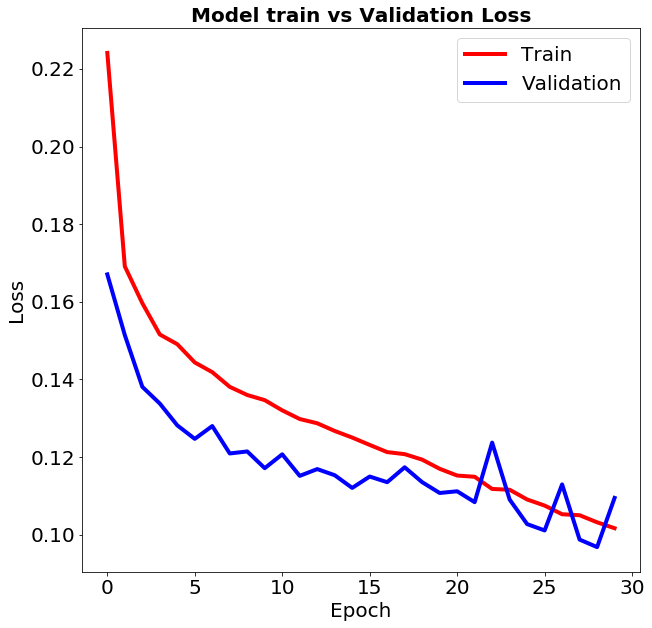

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], linewidth=4, color='r')                   #visualising training and validation loss curves
plt.plot(history.history['val_loss'], linewidth=4, color='b')
plt.title('Model train vs Validation Loss', fontsize=20, fontweight="bold")
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Model Saving

In [0]:
# keras library import  for Saving and loading model and weights

from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("StoredModel.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("modelWeights.h5")

## Using the stored Model to predict & Test

In [26]:
# load json and create model
json_file = open('StoredModel.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("modelWeights.h5")
print("Loaded model from disk")

loaded_model.save('finalModel.hdf5')
loaded_model=load_model('finalModel.hdf5')

Loaded model from disk


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [27]:
file = h5py.File('Dataset_test.h5', 'r')
imgs_test = file.get('images')
#imgs_mask_test = file.get('masks')
imgs_test = np.array(imgs_test)
#imgs_mask_test = np.array(imgs_mask_test)
imgs_test = imgs_test.astype('float32')
imgs_test -= mean
imgs_test /= std

print('*'*30)
print('Loading saved weights...')
print('*'*30)
loaded_model.load_weights('modelWeights.h5')

print('*'*30)
print('Predicting masks on test data...')
print('*'*30)
imgs_mask_test = loaded_model.predict(imgs_test, verbose=1)

******************************
Loading saved weights...
******************************
******************************
Predicting masks on test data...
******************************
49/49 [==============================] - 1s 28ms/step


In [28]:
print('*' * 30)
print('Saving predicted masks to files...')
print('*' * 30)
pred_dir = 'PredictionsFromLoadedModel'
if not os.path.exists(pred_dir):
    os.mkdir(pred_dir)
for i, image in enumerate(imgs_mask_test):
    image = (image * 255).astype(np.uint8)
    cv2.imwrite(os.path.join(pred_dir, str(i + 1) + '_pred.png'), image)

******************************
Saving predicted masks to files...
******************************
